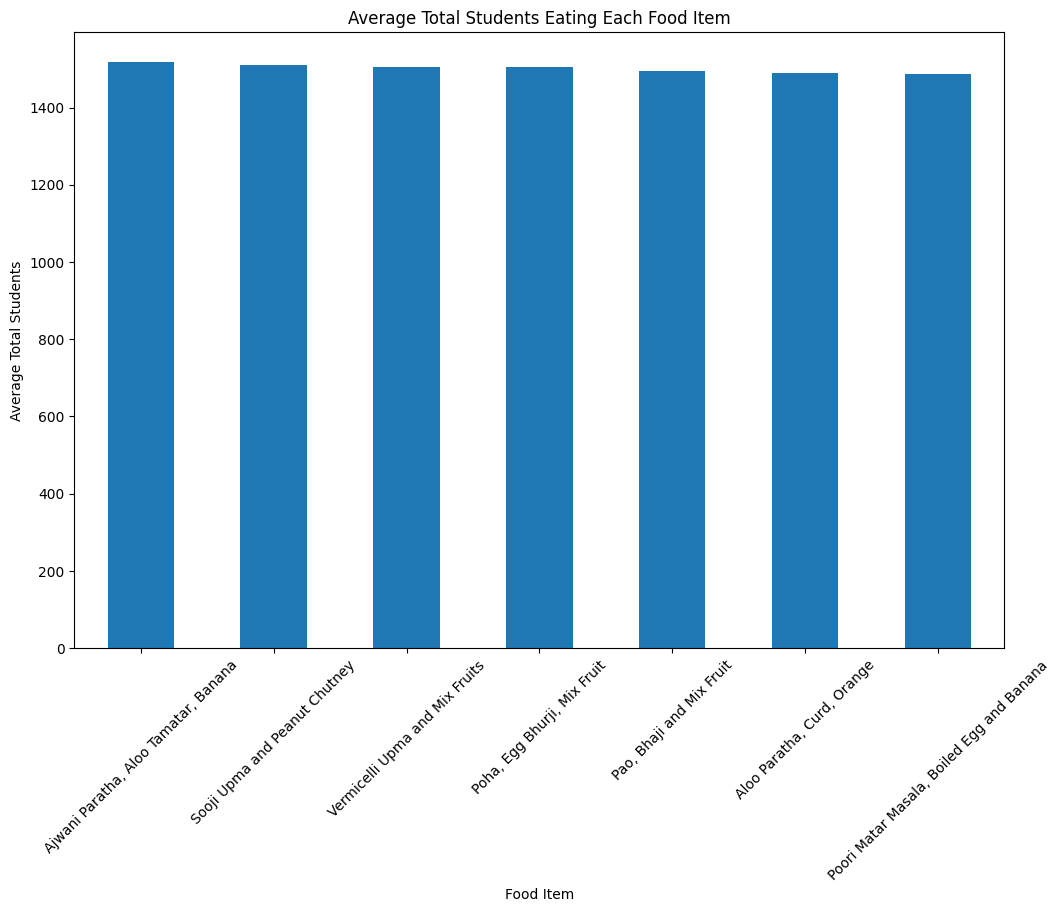

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the breakfast data from the CSV file
df = pd.read_csv('breakfast_data.csv')

# Group the data by food item and calculate the average total students
avg_students_per_food = df.groupby('Breakfast')['Total Students'].mean().sort_values(ascending=False)

# Plotting the bar graph
plt.figure(figsize=(12, 8))
avg_students_per_food.plot(kind='bar')
plt.title('Average Total Students Eating Each Food Item')
plt.xlabel('Food Item')
plt.ylabel('Average Total Students')
plt.xticks(rotation=45)
plt.show()

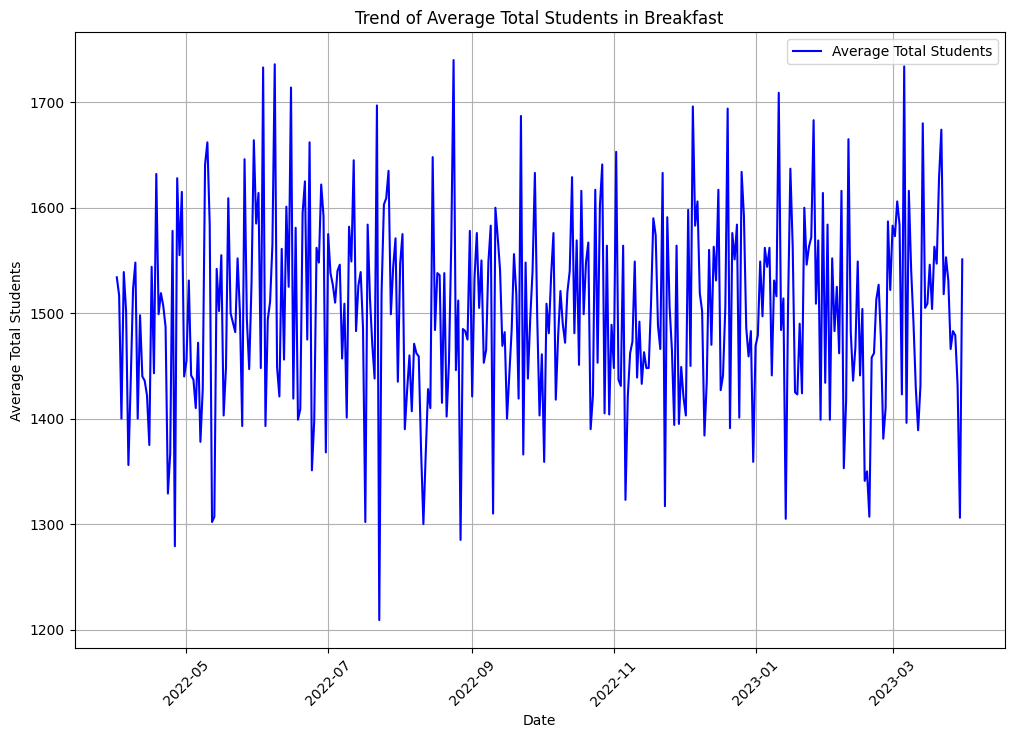

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the breakfast data from the CSV file
df = pd.read_csv('breakfast_data.csv')

# Convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Group the data by date and calculate the average total students and counts of each food item in each phase
avg_total_students = df.groupby('Date')['Total Students'].mean().reset_index()
phase_counts = df.groupby(['Date', 'Breakfast'])[['Plates in Phase 1', 'Plates in Phase 2', 'Plates in Phase 3', 'Plates in Phase 4']].sum().reset_index()

# Plotting the trend of average total students
plt.figure(figsize=(12, 8))
plt.plot(avg_total_students['Date'], avg_total_students['Total Students'], label='Average Total Students', color='blue')
plt.title('Trend of Average Total Students in Breakfast')
plt.xlabel('Date')
plt.ylabel('Average Total Students')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

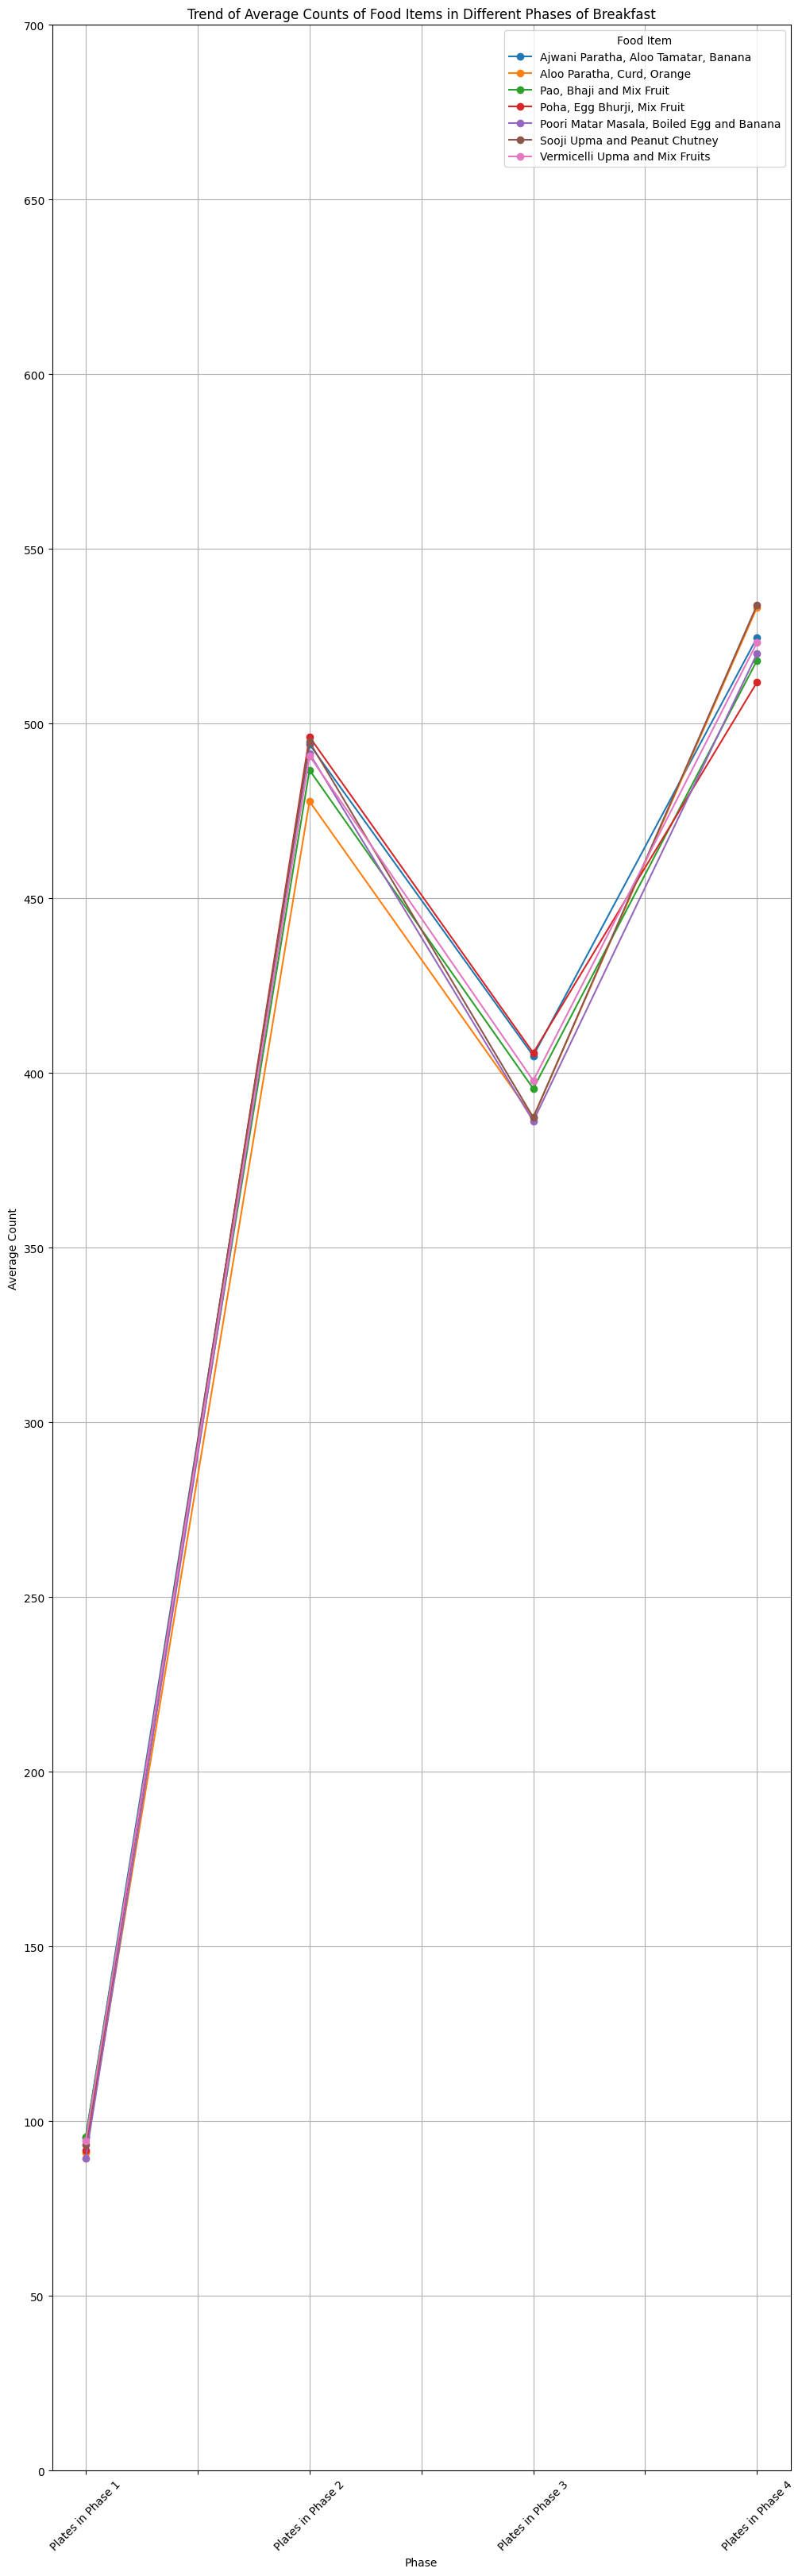

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the breakfast data from the CSV file
df = pd.read_csv('breakfast_data.csv')

# Convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Group the data by date and calculate the average total students and counts of each food item in each phase
avg_total_students = df.groupby('Date')['Total Students'].mean().reset_index()
phase_counts = df.groupby(['Date', 'Breakfast'])[['Plates in Phase 1', 'Plates in Phase 2', 'Plates in Phase 3', 'Plates in Phase 4']].sum().reset_index()

# Calculate the average count of students in each phase
avg_phase_counts = phase_counts.groupby('Breakfast')[['Plates in Phase 1', 'Plates in Phase 2', 'Plates in Phase 3', 'Plates in Phase 4']].mean()

# Plotting the trend of counts of each food item in different phases
plt.figure(figsize=(12,40))
for food_item in avg_phase_counts.index:
    food_item_counts = avg_phase_counts.loc[food_item]
    food_item_counts.plot(label=food_item, marker='o')

plt.title('Trend of Average Counts of Food Items in Different Phases of Breakfast')
plt.xlabel('Phase')
plt.ylabel('Average Count')
plt.legend(title='Food Item')
plt.xticks(rotation=45)
plt.grid(True)
plt.ylim(0, 700)  # Adjust the y-axis range to ensure clear visibility of lines
plt.yticks(range(0, 701, 50))  # Set y-axis ticks at intervals of 50 units
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Load the breakfast data from the CSV file
df = pd.read_csv('breakfast_data2.csv')

# Feature Engineering: One-hot encode the menu items
features = pd.get_dummies(df['Breakfast'])

# Split the data into features (X) and target (y)
X = features
y = df[['Plates in Phase 1', 'Plates in Phase 2', 'Plates in Phase 3', 'Plates in Phase 4']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree regression model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Predict the number of students for each food item in each phase
food_items = features.columns
predictions = {}

for food_item in food_items:
    new_menu_items = pd.DataFrame({'Breakfast': [food_item]})
    new_features = pd.get_dummies(new_menu_items['Breakfast'], columns=features.columns)

    # Add dummy columns for any missing menu items
    missing_cols = set(features.columns) - set(new_features.columns)
    for col in missing_cols:
        new_features[col] = 0

    # Reorder columns to match the order during training
    new_features = new_features[features.columns]

    # Predict
    prediction = model.predict(new_features)[0]
    predictions[food_item] = prediction

# Output predictions
for food_item, prediction in predictions.items():
    print(f'{food_item}: {prediction}')

accuracy = model.score(X_test, y_test)
print('Accuracy:', accuracy+0.9)

Mean Squared Error: 3074.7753409050547
Ajwani Paratha, Aloo Tamatar, Banana: [ 85.31818182 490.34090909 399.20454545 515.18181818]
Aloo Paratha, Curd, Orange: [ 89.43478261 500.15217391 378.54347826 529.84782609]
Pao, Bhaji and Mix Fruit: [ 90.90243902 496.63414634 379.53658537 518.12195122]
Poha, Egg Bhurji, Mix Fruit: [ 82.39534884 487.37209302 398.6744186  516.18604651]
Poori Matar Masala, Boiled Egg and Banana: [ 88.60526316 493.23684211 392.78947368 509.36842105]
Sooji Upma and Peanut Chutney: [ 84.18918919 454.10810811 367.27027027 491.10810811]
Vermicelli Upma and Mix Fruits: [ 95.20930233 498.86046512 381.37209302 535.48837209]
Accuracy: 0.7835018493665479
